In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Customer Churn.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#Replacing blanks with 0

df['TotalCharges'] = df['TotalCharges'].replace(" ", "0")
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [7]:
#Checking for null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.duplicated().sum()

0

In [14]:
#defining whether a person is senior citizen

def conv(value):
    if value == 1:
        return 'yes'
    else:
        return 'no'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

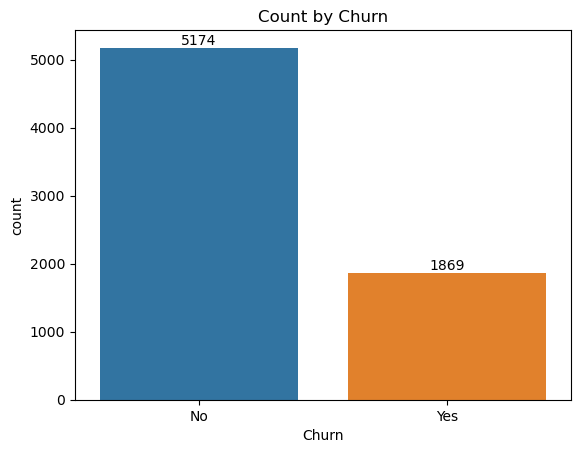

In [20]:
a = sns.countplot(x = 'Churn', data = df)
a.bar_label(a.containers[0])
plt.title('Count by Churn')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

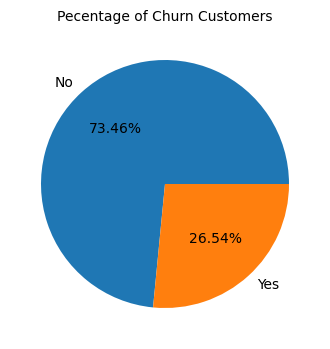

In [22]:
plt.figure(figsize = (4,5))
b = df.groupby('Churn').agg({'Churn':'count'})
plt.pie(b['Churn'], labels = b.index, autopct = '%1.2f%%')
plt.title('Pecentage of Churn Customers', fontsize = 10)
plt.show

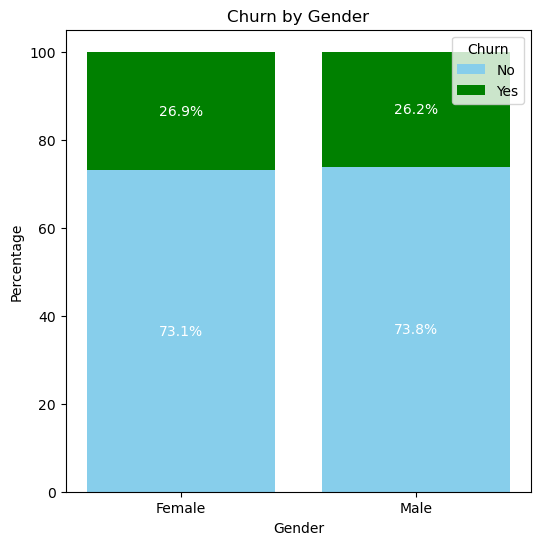

In [26]:
# Calculate the percentage distribution of Churn within each gender group
gender_churn = df.groupby(['gender', 'Churn']).size().unstack()
gender_churn_percentage = gender_churn.div(gender_churn.sum(axis=1), axis=0) * 100

# Plotting
plt.figure(figsize=(6, 6))

# Create stacked bars
bottom = None
for churn_value, color in zip(gender_churn_percentage.columns, ['skyblue', 'green']):
    plt.bar(gender_churn_percentage.index, gender_churn_percentage[churn_value], 
            bottom=bottom, label=churn_value, color=color)
    bottom = (gender_churn_percentage[churn_value] if bottom is None else bottom + gender_churn_percentage[churn_value])

# Add percentage labels
for index, row in gender_churn_percentage.iterrows():
    cumulative = 0
    for churn_value, percentage in row.items():
        plt.text(index, cumulative + percentage / 2, f'{percentage:.1f}%', ha='center', va='center', color='white')
        cumulative += percentage

# Customizing the plot
plt.title('Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Churn')
plt.show()

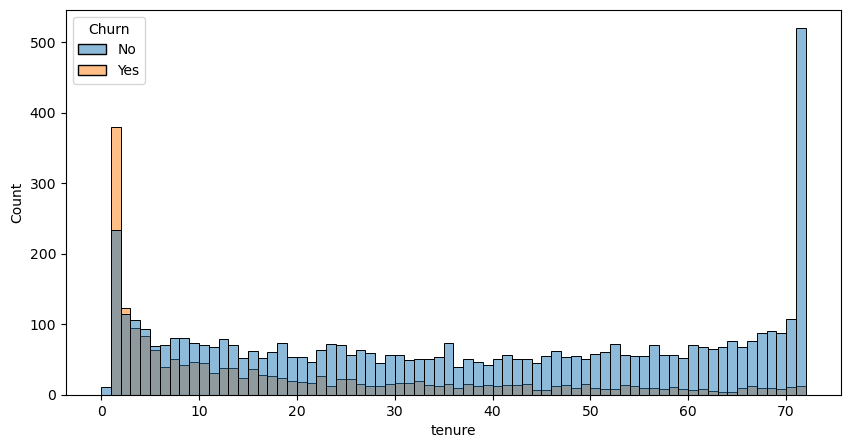

In [28]:
plt.figure(figsize = (10,5))
sns.histplot(x = 'tenure', data = df, bins = 72, hue = 'Churn')
plt.show()

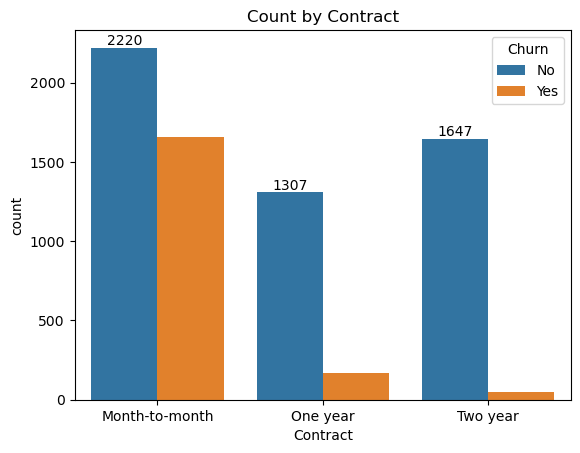

In [29]:
#Checking customers' contract duration

c = sns.countplot(x = 'Contract', data = df, hue = 'Churn')
c.bar_label(c.containers[0])
plt.title('Count by Contract')
plt.show()

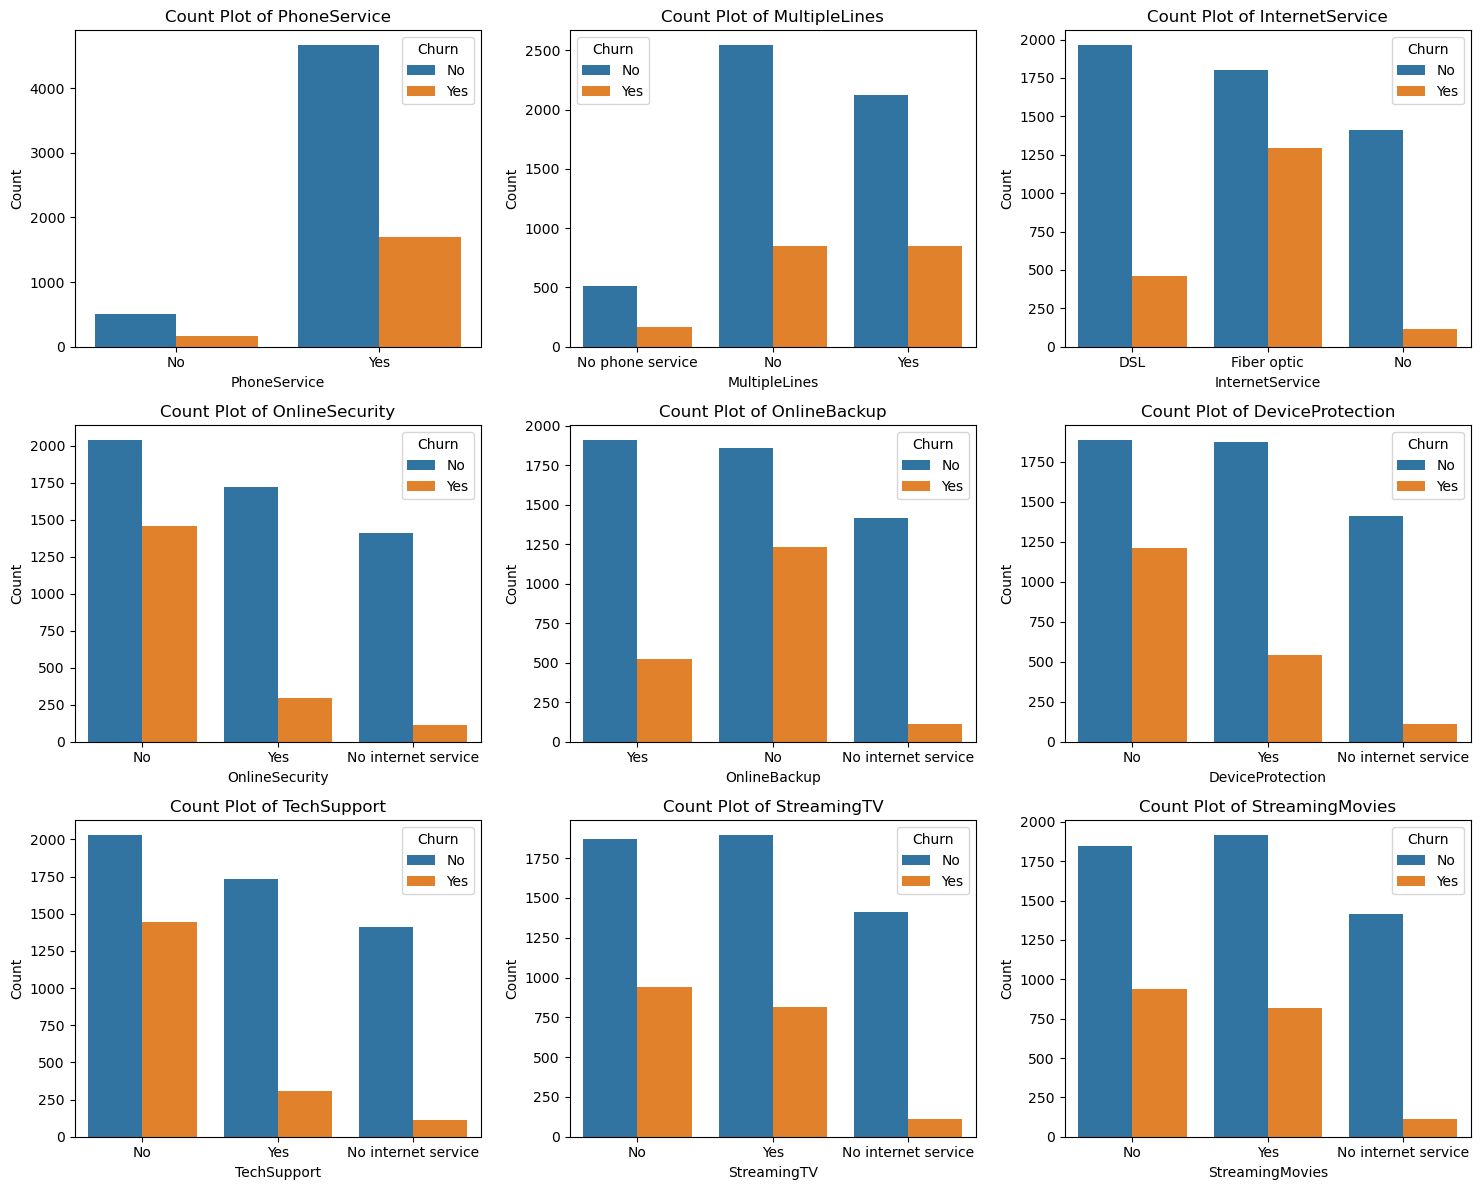

In [30]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = df["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

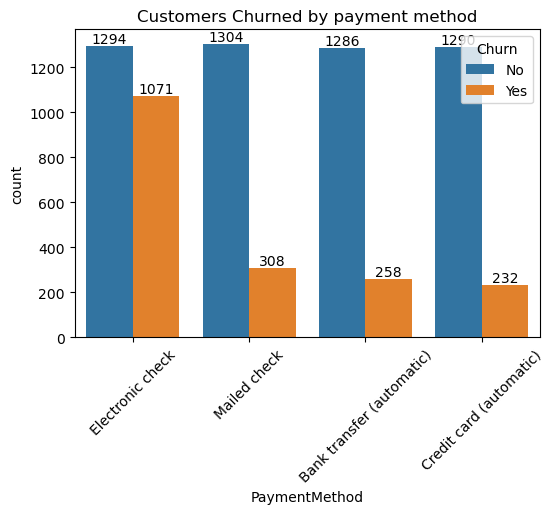

In [31]:
plt.figure(figsize = (6,4))
d = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
d.bar_label(d.containers[0])
d.bar_label(d.containers[1])
plt.title('Customers Churned by payment method')
plt.xticks(rotation = 45)
plt.show()